In [365]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [452]:
img_path = 'examplesheet/sheet2.png'
img = cv.imread(img_path)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,11,2)

_, th1 = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)


cv.imshow("Original", th3)
cv.waitKey(0)
cv.destroyAllWindows()

In [382]:
# Converting to zeros and ones
binary_th3 = th3/255
th3_sum = np.sum(binary_th3, axis=1)
th3_sum

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         2.,  39.,  24.,  17.,  14.,  72.,  65.,  58.,  55.,  52.,  48.,
        50.,  54.,  77.,  29.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   7.,  21.,  15.,  19.,  19.,
        17.,  22.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   8.,
         5.,  13.,   9.,  14.,  17.,   6.,   0.,   0.,   0.,   0.,   0.,
         0.,   8.,  23.,   8.,  61.,  87., 161., 108., 124., 110., 421.,
        67.,  92.,  97., 422.,  99.,  89.,  68., 391., 127.,  91., 162.,
       394., 167.,  69.,  68., 386., 323.,  48.,  41.,  96.,  98.,  38.,
       114., 112.,  21.,  19.,  19.,  17.,  47.,  47.,  41.,  37.,  52.,
        58.,  93.,  37.,  28.,  36., 119.,  38.,  39.,  46., 446.,  51.,
        54.,  49., 430.,  57.,  62.,  60., 430.,  5

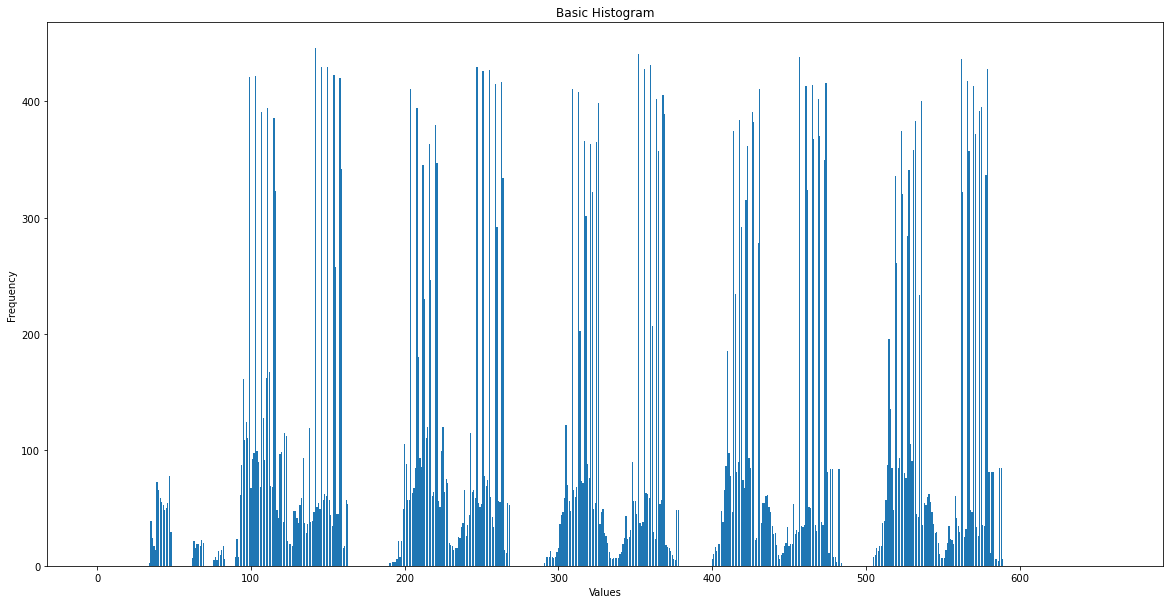

In [383]:
values = np.arange(1,661)
plt.figure(figsize=(20,10))
plt.bar(values, th3_sum)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

In [410]:
row_thresh = 0.5* np.max(th3_sum)
row_thresh, np.max(th3_sum)

(223.0, 446.0)

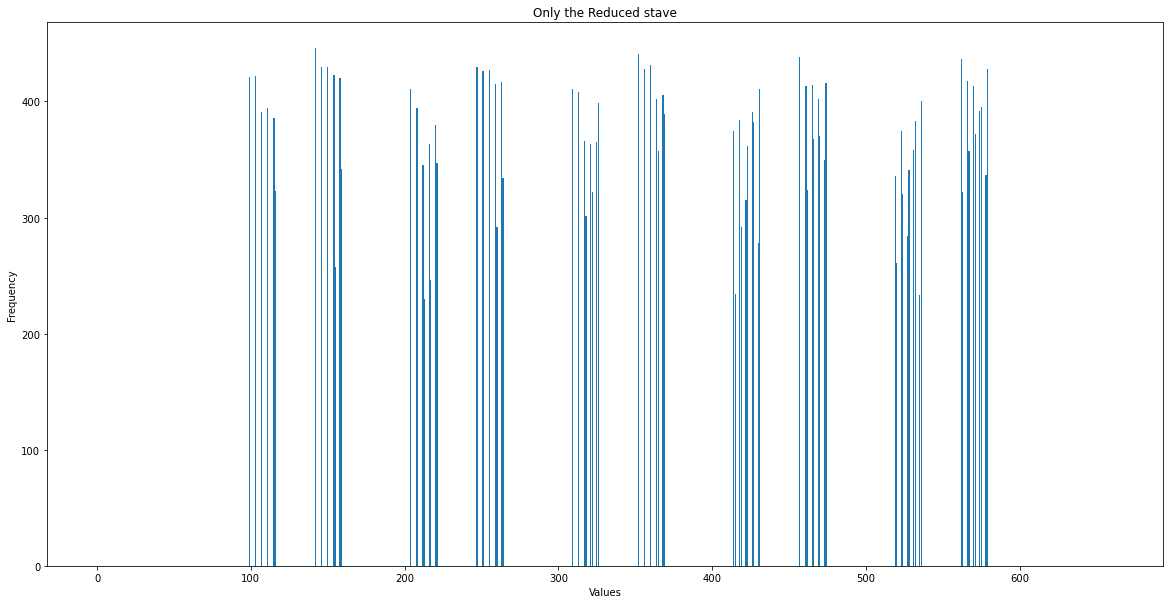

In [411]:
potential_staff_index = [index for index in range(len(th3)) if th3_sum[index]>=row_thresh]
only_potential_staff = [0 if i not in potential_staff_index else th3_sum[i] for i in range(len(th3))]

#Do some last filtering to get each staff segment and find the 5 most prominent point in the segment 

plt.figure(figsize=(20,10))
plt.bar(values, only_potential_staff)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Only the Reduced stave')

plt.show()



In [412]:
only_potential_staff

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 421.0,
 0,
 0,
 0,
 422.0,
 0,
 0,
 0,
 391.0,
 0,
 0,
 0,
 394.0,
 0,
 0,
 0,
 386.0,
 323.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 446.0,
 0,
 0,
 0,
 430.0,
 0,
 0,
 0,
 430.0,
 0,
 0,
 0,
 423.0,
 257.0,
 0,
 0,
 420.0,
 342.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 411.0,
 0,
 0,
 0,
 394.0,
 0,
 0,
 0,
 345.0,
 230.0,
 0,
 0,
 363.0,
 246.0,
 0,
 0,
 380.0,
 347.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [438]:
def split_by_zero_runs(y, n):
    segments = []
    zero_count = 0
    for index, value in enumerate(y):
        if value == 0:
            zero_count += 1
            if zero_count == n:
                segments.append("*")
            elif zero_count > n:
                continue  
        else:
            zero_count = 0
            segments.append((index,value))
    return segments

# Instead of finding the top k segments average close segments
def avg_close_segments(segments):
    current_segment = []
    final_segments = []
    for seg in segments:
        if seg != "*":
            current_segment.append(seg)
        elif seg == "*":
            if not current_segment:
                continue
            else:
                temp_dict = dict(current_segment)
                idx = sorted(temp_dict.keys())
                max_gap = 1  # "close" means consecutive keys (gap <= 1)
                groups = []
                cur = [idx[0]]
                for k in idx[1:]:
                    if k - cur[-1] <= max_gap:
                        cur.append(k)
                    else:
                        groups.append(cur)
                        cur = [k]
                groups.append(cur)
                for result in [(g[0], float(np.mean([temp_dict[x] for x in g]))) for g in groups]:
                    final_segments.append(result)
                    current_segment = []
    return final_segments

def top_k_in_segment(segments, k):
    current_segment = []
    final_segments = []
    for seg in segments:
        if seg != "*":
            current_segment.append(seg)
        elif seg == "*":
            for result in sorted(current_segment, key=lambda t: t[1], reverse=True)[:k]:
                final_segments.append(result)
                current_segment = []

    return final_segments



segments = split_by_zero_runs(only_potential_staff, n=20)
# top = top_k_in_segment(segments, k = 5)
top = avg_close_segments(segments)



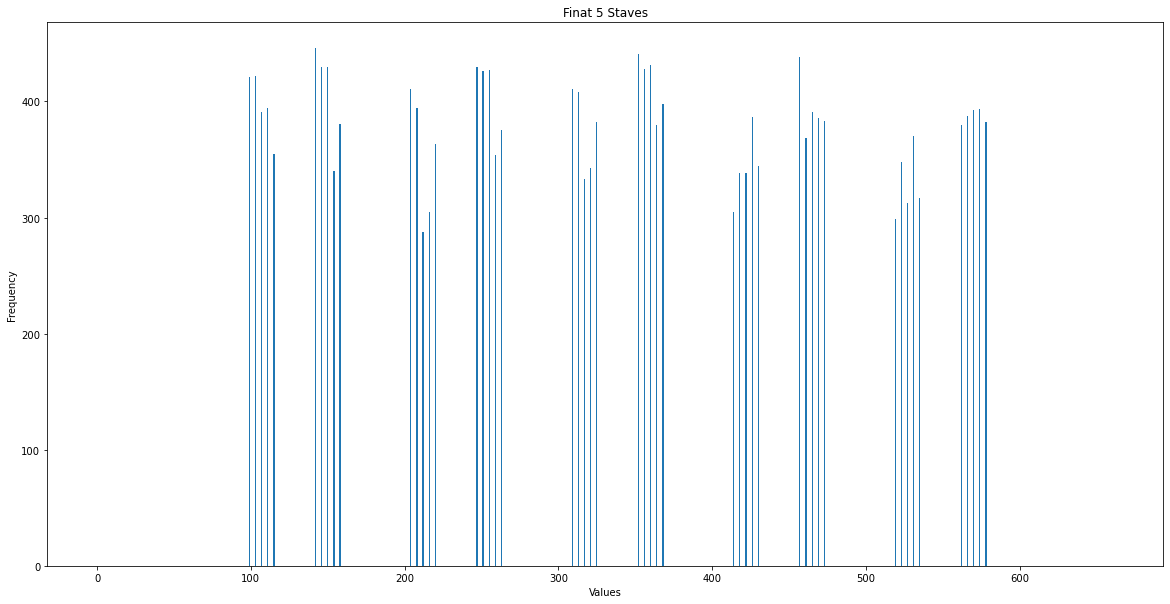

In [439]:
staves_index = [index for index, _ in top]
top_dict = dict(top)
final_five_staves = [0 if i not in staves_index else top_dict[i] for i in range(len(th3))]

plt.figure(figsize=(20,10))
plt.bar(values, final_five_staves)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Finat 5 Staves')
plt.show()



In [453]:
'''
So there is a problem here with the implementation for trying to remove the staff lines, but sometimes the pixels spills to the next row and we need to account for that

So one solution I am thinking about is to add atleast 2 pixel rows in the non-zero matrix that conatins the index of the stave lines, so you can center it around the in the non-zero eg (97,"98",99)
'''
# Mask the staff
# Get the index of the non 0 elements thoes are the ones to remove
non_zero = [idx for idx, val in enumerate(final_five_staves) if val != 0]
# symbols_only_img = np.delete(th3,non_zero, axis=0) 

symbols_only_img = th3.copy()
symbols_only_img[non_zero, :] = 0

cv.imshow("1_Symbols", symbols_only_img)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
# We need to split the sheet horizontal so we can atleast crop the clef part

# Since we can find the first row of the stave we can split
non_zero[0]

first_staf_line = symbols_only_img[98]
horizonta_pixel_ = 0.25 * len(first_staf_line)

horizonta_pixel






125.0

In [ ]:
a = np.array([[1,2,3], [4,5,6], [7,9,8]])

a[1]

### Every Code below this point is Chat GPT

In [373]:
import cv2 as cv
import numpy as np

img_path = 'examplesheet/sheet2.png'
img = cv.imread(img_path)

# --- CHANGED: imread() is BGR, not RGB ---
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th3 = cv.adaptiveThreshold(
    gray, 255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY_INV,
    11, 2
)

cv.imshow("Original", th3)
cv.waitKey(0)
cv.destroyAllWindows()

# Converting to zeros and ones
# --- CHANGED: use an explicit 0/1 foreground mask (more reliable than /255 floats) ---
binary_th3 = (th3 > 0).astype(np.uint8)

th3_sum = np.sum(binary_th3, axis=1)

# --- CHANGED: use a relative threshold instead of a hard-coded 250 ---
# (rows with long staff lines should be near the top end of th3_sum)
row_thresh = 0.6 * np.max(th3_sum)  # tweak 0.5–0.8 if needed
potential_staff_index = [i for i in range(len(th3_sum)) if th3_sum[i] > row_thresh]

only_potential_staff = [0 if i not in potential_staff_index else th3_sum[i] for i in range(len(th3_sum))]


def split_by_zero_runs(y, n):
    segments = []
    zero_count = 0
    for index, value in enumerate(y):
        if value == 0:
            zero_count += 1
            if zero_count == n:
                segments.append("*")
            elif zero_count > n:
                continue
        else:
            zero_count = 0
            segments.append((index, value))
    return segments


def top_k_in_segment(segments, k):
    """
    For each segment (between '*'), collapse contiguous index bands into one representative
    (center row) so thick staff lines don't produce multiple picks.
    Then choose top-k bands by their aggregated strength.
    """
    current_segment = []
    final_segments = []

    def flush_segment(seg_items):
        if not seg_items:
            return

        # seg_items is a list of (index, value)
        # 1) group contiguous indices into bands
        bands = []
        band = [seg_items[0]]
        for item in seg_items[1:]:
            if item[0] == band[-1][0] + 1:
                band.append(item)
            else:
                bands.append(band)
                band = [item]
        bands.append(band)

        # 2) represent each band by its center row, and score by max value in the band
        reps = []
        for b in bands:
            idxs = [t[0] for t in b]
            vals = [t[1] for t in b]
            center_idx = int(round(np.mean(idxs)))
            score_val = float(np.max(vals))
            reps.append((center_idx, score_val))

        # 3) pick top-k bands
        reps = sorted(reps, key=lambda t: t[1], reverse=True)[:k]
        final_segments.extend(reps)

    for seg in segments:
        if seg != "*":
            current_segment.append(seg)
        else:
            # --- CHANGED: flush current segment properly ---
            flush_segment(current_segment)
            current_segment = []

    # --- CHANGED: also flush the last segment if there's no trailing '*' ---
    flush_segment(current_segment)

    return final_segments


segments = split_by_zero_runs(only_potential_staff, n=20)
top = top_k_in_segment(segments, k=5)

# staves_index = [index for index, _ in top]
# top_dict = dict(top)
# final_five_staves = [0 if i not in staves_index else top_dict[i] for i in range(len(th3_sum))]

# # Remove the staff lines (pixel masking, not deleting rows)

# # --- CHANGED: build a staff-line pixel mask using morphology (horizontal line extraction) ---
# # This extracts long horizontal strokes (staff lines) from th3.
# h, w = th3.shape
# kernel_len = max(25, w // 15)  # tweak if needed (bigger -> keeps only longer lines)
# h_kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_len, 1))
# staff_mask = cv.morphologyEx(th3, cv.MORPH_OPEN, h_kernel)

# # --- Optional: restrict the mask to rows we already believe are staff rows (reduces false positives) ---
# row_mask = np.zeros_like(th3)
# # Use the same indices you used for staff-candidate rows:
# non_zero_rows = [idx for idx, val in enumerate(only_potential_staff) if val != 0]
# row_mask[non_zero_rows, :] = 255
# staff_mask = cv.bitwise_and(staff_mask, row_mask)

# # --- CHANGED: remove staff pixels while keeping image shape ---
# symbols_only_img = cv.bitwise_and(th3, cv.bitwise_not(staff_mask))

# cv.imshow("1_Symbols", symbols_only_img)
# cv.waitKey(0)
# cv.destroyAllWindows()


In [376]:
top

[(102, 422.0),
 (98, 421.0),
 (110, 394.0),
 (106, 391.0),
 (114, 386.0),
 (141, 446.0),
 (145, 430.0),
 (149, 430.0),
 (153, 423.0),
 (158, 420.0),
 (203, 411.0),
 (207, 394.0),
 (220, 380.0),
 (215, 363.0),
 (211, 345.0),
 (246, 430.0),
 (254, 427.0),
 (250, 426.0),
 (262, 417.0),
 (258, 415.0),
 (308, 411.0),
 (312, 408.0),
 (324, 399.0),
 (316, 366.0),
 (320, 363.0),
 (351, 441.0),
 (359, 431.0),
 (355, 428.0),
 (368, 406.0),
 (364, 402.0),
 (430, 411.0),
 (426, 391.0),
 (418, 384.0),
 (413, 375.0),
 (422, 362.0),
 (456, 438.0),
 (472, 416.0),
 (464, 414.0),
 (460, 413.0),
 (468, 402.0),
 (535, 400.0),
 (530, 383.0),
 (522, 375.0),
 (526, 341.0),
 (518, 336.0),
 (562, 437.0),
 (578, 428.0),
 (566, 418.0),
 (570, 413.0),
 (574, 395.0)]

In [362]:
cv.imshow("staff_mask", staff_mask)
cv.waitKey(0)
cv.destroyAllWindows()


In [363]:
import cv2 as cv
import numpy as np

img_path = 'examplesheet/sheet2.png'
img = cv.imread(img_path)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th3 = cv.adaptiveThreshold(
    gray, 255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY_INV,
    11, 2
)

cv.imshow("Original", th3)
cv.waitKey(0)
cv.destroyAllWindows()

# Converting to zeros and ones
binary_th3 = (th3 > 0).astype(np.uint8)
th3_sum = np.sum(binary_th3, axis=1)

# Relative threshold (more stable than a hard-coded number)
row_thresh = 0.6 * np.max(th3_sum)
potential_staff_index = [i for i in range(len(th3_sum)) if th3_sum[i] > row_thresh]
only_potential_staff = [0 if i not in potential_staff_index else th3_sum[i] for i in range(len(th3_sum))]


def split_by_zero_runs(y, n):
    segments = []
    zero_count = 0
    for index, value in enumerate(y):
        if value == 0:
            zero_count += 1
            if zero_count == n:
                segments.append("*")
            elif zero_count > n:
                continue
        else:
            zero_count = 0
            segments.append((index, value))
    return segments


def top_k_in_segment(segments, k):
    current_segment = []
    final_segments = []

    def flush_segment(seg_items):
        if not seg_items:
            return

        # Group contiguous indices into bands (handles staff thickness)
        bands = []
        band = [seg_items[0]]
        for item in seg_items[1:]:
            if item[0] == band[-1][0] + 1:
                band.append(item)
            else:
                bands.append(band)
                band = [item]
        bands.append(band)

        # Represent each band by its center row, score by max value in band
        reps = []
        for b in bands:
            idxs = [t[0] for t in b]
            vals = [t[1] for t in b]
            center_idx = int(round(np.mean(idxs)))
            score_val = float(np.max(vals))
            reps.append((center_idx, score_val))

        # Pick top-k bands
        reps = sorted(reps, key=lambda t: t[1], reverse=True)[:k]
        final_segments.extend(reps)

    for seg in segments:
        if seg != "*":
            current_segment.append(seg)
        else:
            flush_segment(current_segment)
            current_segment = []

    flush_segment(current_segment)
    return final_segments


segments = split_by_zero_runs(only_potential_staff, n=20)
top = top_k_in_segment(segments, k=5)

staves_index = [index for index, _ in top]
top_dict = dict(top)
final_five_staves = [0 if i not in staves_index else top_dict[i] for i in range(len(th3_sum))]

# ----------------------------
# Staff line removal (improved)
# ----------------------------

# 1) Restrict removal to thin horizontal bands around detected staff-line centers
row_mask = np.zeros_like(th3)
band = 2  # try 1–3
for r in staves_index:
    r0 = max(0, r - band)
    r1 = min(th3.shape[0], r + band + 1)
    row_mask[r0:r1, :] = 255

# 2) Reconnect broken staff lines slightly before extracting long horizontals
small = cv.getStructuringElement(cv.MORPH_RECT, (7, 1))  # try 5–15
th3_connected = cv.morphologyEx(th3, cv.MORPH_CLOSE, small)

# 3) Extract only very long horizontal strokes (avoid short beams)
kernel_len = max(60, th3.shape[1] // 3)  # increase if beams still appear
h_kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_len, 1))
staff_mask = cv.morphologyEx(th3_connected, cv.MORPH_OPEN, h_kernel)

# 4) Apply row restriction (critical)
staff_mask = cv.bitwise_and(staff_mask, row_mask)

# Optional debug: see what you're removing
cv.imshow("staff_mask", staff_mask)
cv.waitKey(0)
cv.destroyAllWindows()

# 5) Remove staff pixels while preserving geometry
symbols_only_img = cv.bitwise_and(th3, cv.bitwise_not(staff_mask))

cv.imshow("1_Symbols", symbols_only_img)
cv.waitKey(0)
cv.destroyAllWindows()
